In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [0]:
df = pd.read_csv('X.csv')
obj = pd.read_csv('accidentes_obj.csv')

In [0]:
df = df.drop(['NUM_GRAVEDAD'],axis=1)
y = obj.drop(['FECHA',	'HORA',	'CLASE',	'DIRECCION',	'DIRECCION_ENC','CBML','TIPO_GEOCOD',	'BARRIO',	'COMUNA',	'DISENO',	'MES_NOMBRE'], axis = 1)

In [0]:
df['clasificacion'] = y['GRAVEDAD']

In [90]:
df.head(5)

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,DIA_SEMANA,MES,NUM_COMUNA,NUM_DISENO,NUM_CLASE,NUM_BARRIO,clasificacion
0,-75.584608,6.261152,550556.0,1612819.0,14.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,HERIDO
1,-75.582266,6.293102,550557.0,1612866.0,14.0,2018.0,0.0,1.0,1.0,1.0,0.0,1.0,SOLO DAÑOS
2,-75.560337,6.252080,550558.0,1612809.0,14.0,2018.0,0.0,1.0,2.0,1.0,1.0,2.0,HERIDO
3,-75.597828,6.222382,550559.0,1612812.0,14.0,2018.0,0.0,1.0,3.0,0.0,2.0,3.0,HERIDO
4,-75.561804,6.236754,550560.0,1612817.0,14.0,2018.0,0.0,1.0,4.0,1.0,0.0,4.0,SOLO DAÑOS


In [0]:
trainRandom = np.random.rand(len(df))< 0.6
train= df[trainRandom]
test = df[~trainRandom]

In [92]:
print(f'Numero en entrenamiento : {len(train)}')
print(f'Numero en prueba : {len(test)}')


Numero en entrenamiento : 42594
Numero en prueba : 28325


In [104]:
features = df.columns[:12]
features

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'DIA', 'PERIODO', 'DIA_SEMANA', 'MES',
       'NUM_COMUNA', 'NUM_DISENO', 'NUM_CLASE', 'NUM_BARRIO'],
      dtype='object')

In [0]:
y_ = pd.factorize(train['clasificacion'])[0]
p = pd.DataFrame({"clase":y_})

In [0]:
clf = GaussianNB()

In [108]:
clf.fit(train[features], y_)

GaussianNB(priors=None, var_smoothing=1e-09)

In [109]:
clf.predict(test[features])

array([0, 0, 0, ..., 1, 0, 1])

In [0]:
preds = df.clasificacion[clf.predict(test[features])]
preds = np.array(preds[0:len(test)])

In [114]:
from sklearn.metrics import confusion_matrix
matrix = pd.crosstab(test['clasificacion'],preds, rownames=['Gravedad'], colnames=['Predicted'], margins = True)
matrix


Predicted,HERIDO,SOLO DAÑOS,All
Gravedad,,,
HERIDO,6427,8602,15029
MUERTO,39,64,103
SOLO DAÑOS,10853,2340,13193
All,17319,11006,28325


Text(0.5, 257.44, 'Etiqueta de prediccion')

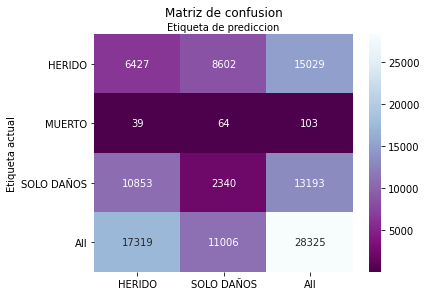

In [180]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(matrix), annot = True, cmap = 'BuPu_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

In [146]:
from sklearn.metrics import accuracy_score
precision = accuracy_score(test['clasificacion'], preds)
print('Precisión del modelo:\n',precision)

Precisión del modelo:
 0.3095145631067961
